# 수학교육에 활용할 수 있는 챗봇을 만들자 !! 

<p> &nbsp;

# +++++++++++++++++++++++++ 

## 1. 인공지능의 학습과 인간의 학습을  탐구

## 2. 구체적으로 수학교육용 인공지능 개발 



# +++++++++++++++++++++++++

## 교재의 챕더 1,2,3 통해서 기본을 학습하고

## 챕터 4장 5장에서 텍스트분류와 유사도를 

## 팀별 발료로 학습한다.  목표는 챕터 6

## 수학교육용 한글 챗봇을 만드는 것이다 


    





<p> &nbsp;
    
# 인공지능 번역과 텐서플로우 2.0 버젼 학습
<p>    &nbsp;


###################################################################


# (목표) Toy 코드와 Attentoin 으로 챗봇을 설계!


<p> &nbsp;



# Toy 코드 (파트A+파트B) 와 어텐션 코드 C

# +++++++++++++++++++++++++++++++++

# [목표] 파트 A + 파트 B  ++ 어텐션 파트 C 

<p> &nbsp;

#####################################################################
<p> &nbsp;

### 파트 A와 B는 다음 주소의 설명코드를 ipython 만든 것

https://crazia.tistory.com/entry/Deep-Learning-seq2seq-%EB%A5%BC-%EC%9D%B4%EC%9A%A9%ED%95%9C-%EC%B1%97%EB%B4%87-Neural-Machine-Chatbot


##########################################################
    
## 파트 C 의 코드는 Attention matrix 에 대한 내용이다 !!

### https://www.tensorflow.org/tutorials/text/nmt_with_attention





## (참고) 

### https://www.tensorflow.org/tutorials/text/transformer
    
    
    
# 구글의 머신트랜스레이션과 어텐션 활용

https://github.com/tensorflow/nmt


# 준비  : 다음을 통해 파트 챗봇 데이터를 탐구하자 !! 

In [2]:
import re


DATA_PATH="./data_nmt/conversation2.txt" 
############## 챗봇 데이터 ############




def Tokenizer( sentence ):
    token=[]
    for word in sentence.strip().split():
        token.extend(re.compile("([.,!?\"':;)(])").split(word))
        
    ret=[t for t in token if t]
    return ret             

    
    
wordsk=[]
datask=[]



with open( DATA_PATH , 'r' , encoding='utf-8' ) as f:
    lines=f.read()
    datask.append(lines)
    wordsk=Tokenizer( lines  )
    wordsk=list( set( wordsk ) )

    
# list <=== datas.shape 


print( wordsk[0:10] )

datask[0][0:100] 

['금융챗봇이야', '머리가', '당신은요', '못생겼나요', '좋은', '감사합니요다', '껴', '내리네요', '캄보디아의', '챙겨야겠어요']


'어떻게 지내세요?\n잘 지내고 있어요. 당신은요?\n저도 잘 지내고 있어요.\n네, 그럼 안녕히 가세요.\n계속 연락해요.\n네, 제가 곧 다시 연락 드릴게요.\n이메일로 연락주세요.\n지금 '

In [3]:
from konlpy.tag import Okt

okt = Okt()


wordsz=[]
datasz=[]

with open(  DATA_PATH , 'r', encoding='utf-8') as  content_file :
    for con in content_file: 
        content = content_file.read()
        datasz.append( content )
        wordsz.extend( okt.morphs(content)   )
        wordsz = list(set(wordsz))

            
print( wordsz[0:10] )

datasz[0][0:100] 

['가을', '상영', '좋은', '급', '걱정', '파키스탄', '껴', '내리네요', '헤어', '1,294.67원']


'잘 지내고 있어요. 당신은요?\n저도 잘 지내고 있어요.\n네, 그럼 안녕히 가세요.\n계속 연락해요.\n네, 제가 곧 다시 연락 드릴게요.\n이메일로 연락주세요.\n지금 어디신가요?\n집이요'

# 쳇봇 데이터 다루기 

    f = pd.DataFrame([['1위', '심재철'],
                ['2위', '서미경']],
               columns=['rank', 'keyword'])

In [4]:
import pandas as pd

file = open( "./data_nmt/conversation2.txt", "r" , encoding="utf-8")
data = file.readlines()
df1 = []
for ii in data:
    df1.append(ii[:-1])


df2 = pd.DataFrame( df1  )
 
df2.to_csv( './data_nmt/conversation2.csv' , index=False, encoding='utf-8')


datacsv = pd.read_csv( './data_nmt/conversation2.csv' ,  encoding='utf-8')

datacsv

,0
0,어떻게 지내세요?
1,잘 지내고 있어요. 당신은요?
2,저도 잘 지내고 있어요.
3,"네, 그럼 안녕히 가세요."
4,계속 연락해요.
...,...
495,그러게요. 거긴 어때요?
496,매우 포근한 날씨네요.
497,나들이 가기 좋은 날씨죠.
498,안녕하세요


In [5]:
print( datacsv[0:5] )

result_data=list( )

input_data = list( datacsv['0'][0:5] )
######################################

for seq in input_data :
    print( seq )
    result = " ".join( okt.morphs(seq.replace(' ', '')))
    result_data.append( result )
    
print( result_data )

datas = []

datas.extend( result_data )
             
datas


                  0
0         어떻게 지내세요?
1  잘 지내고 있어요. 당신은요?
2     저도 잘 지내고 있어요.
3    네, 그럼 안녕히 가세요.
4          계속 연락해요.
어떻게 지내세요?
잘 지내고 있어요. 당신은요?
저도 잘 지내고 있어요.
네, 그럼 안녕히 가세요.
계속 연락해요.
['어떻게 지내세요 ?', '잘 지내고있어요 . 당 신 은 요 ?', '저 도 잘 지내고있어요 .', '네 , 그럼 안녕히가세요 .', '계속 연락 해 요 .']


['어떻게 지내세요 ?',
 '잘 지내고있어요 . 당 신 은 요 ?',
 '저 도 잘 지내고있어요 .',
 '네 , 그럼 안녕히가세요 .',
 '계속 연락 해 요 .']

In [6]:

import re

FILTERS = "([~.,!?\"':;)(])"
CHANGE_FILTER = re.compile(FILTERS)

vocabwords = []
for sentence in datas:
    # FILTERS = "([~.,!?\"':;)(])"
    # 위 필터와 같은 값들을 정규화 표현식을 
    # 통해서 모두 "" 으로 변환 해주는 부분이다.
    sentence = re.sub(CHANGE_FILTER, "", sentence)
    for word in sentence.split():
        vocabwords.append(word)
            
print( vocabwords )

['어떻게', '지내세요', '잘', '지내고있어요', '당', '신', '은', '요', '저', '도', '잘', '지내고있어요', '네', '그럼', '안녕히가세요', '계속', '연락', '해', '요']


In [7]:
# from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split




def load_data():
    # 판다스를 통해서 데이터를 불러온다.
    data_df = pd.read_csv( './data_nmt/conversation2.csv', header=0)
    # 질문과 답변 열을 가져와 question과 answer에 넣는다.
    # 홓수줄 짝수불 
    
    question = data_df[0::2]
    answer = data_df[1::2]


    
    # skleran에서 지원하는 함수를 통해서 학습 셋과 
    # 테스트 셋을 나눈다.
    
    train_input, eval_input, train_label, eval_label = train_test_split(question, answer, test_size=0.33, random_state=42)
    
    # 그 값을 리턴한다.
    return train_input, train_label, eval_input, eval_label




train_input, train_label, eval_input, eval_label = load_data()



In [8]:
print( train_input['0'][0:5] )

print( train_label[0:5] )

462         핀란드의 수도는?
340     단풍 구경하러 가실래요?
130          한번 봐야겠어요
280    나이에 비해 어려 보여요.
248           감사합니요다.
Name: 0, dtype: object
            0
463  헬싱키 입니다.
341       좋죠.
131   엄청 재밌어요
281    감사합니다.
249     천만에요.


# ++++++++++++++++++++++++++++++++++++++++
<p> &nbsp;

# [목표] 챗봇 데이터를 보강한 한글 okt() 챗봇으로 !!

<p> &nbsp;

# [참고] 5.교재한글CHATBOT.ipynb 코드를 활용 !    
    
<p> &nbsp;
    
# ++++++++++++++++++++++++++++++++++++++++

<p> &nbsp;
    
# [출발점 코드] 아래는 okt 안쓰는 코드 (okt 로 바꿈)
    
  
    
# ++++++++++++++++++++++++++++++++++++++++

# [탐구실험 시작]  toy 코드로 파트 A 와 파트 B  시작  !! 

In [9]:

import tensorflow.compat.v1  as tf



tf.disable_eager_execution()



########### 모델 ###############


train_dir="./data_nmt/model" # model directory

log_dir="./data_nmt/logs" #log directory

ckpt_name="conversation.ckpt" #checkpoint 


######## 데이터 ##################


DATA_PATH="./data_nmt/conversation2.txt" #data

VOC_PATH="./data_nmt/conversation.voc" #data.voc

#################################


C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\WinPython37F\python-3.7.2.amd64\lib\site-packages\tensorflow\python\frame

In [10]:
#-*- coding: utf-8 -*-
#import tensorflow.compat.v1  as tf


import numpy as np
import codecs
import re



##########################################
# 함글 처리를 할 것인가 ??? 학기말 과제 ??


# from konlpy.tag import Okt

# okt=Okt()


########################################
# 이걸 쓰는 경우에는 # 을 없앤다 
#########################################
########################################




PAD="_PAD_"
GO="_GO_"
EOS="_EOS_"
UNK="_UNK_"

PAD_ID=0
GO_ID=1
EOS_ID=2
UNK_ID=3
ALL=[PAD_ID,GO_ID, EOS_ID,UNK_ID]



class Conversation():
    
    voc_list=[]
    voc_dict=[]
    voc_size=[]
    conversation=[]
    ##############
    index_in_epoch=0

    def Tokens_to_index(self, token):
        index=[]
        for word in token:
            if word in self.voc_dict:
                index.append(self.voc_dict[word])
            else:
                index.append( UNK_ID)
        return index

    def Index_to_token(self,index):
        token=[]
        for word in index:
            token.append(self.voc_list[word])
        return token

    def pad(self, seq, max_len, start=None, eos=None):
        if start:
            padded_seq = [ GO_ID] + seq
        elif eos:
            padded_seq = seq + [ EOS_ID]
        else:
            padded_seq = seq

        if len(padded_seq) < max_len:
            return padded_seq + ([ PAD_ID] * (max_len - len(padded_seq)))
        else:
            return padded_seq

    def pad_left(self, seq, max_len):
        if len(seq) < max_len:
            return ([ PAD_ID] * (max_len - len(seq))) + seq
        else:
            return seq


    def transform(self, input, output, input_max, output_max):

        enc_input = self.pad(input, input_max)
        dec_input = self.pad(output, output_max, start=True)
        target = self.pad(output, output_max, eos=True)

        enc_input.reverse()
        enc_input = np.eye(self.voc_size)[enc_input]
        dec_input = np.eye(self.voc_size)[dec_input]

        return enc_input, dec_input, target

    def max_len(self, batch_set):
        max_len_input = 0
        max_len_output = 0

        for i in range(0, len(batch_set), 2):
            len_input = len(batch_set[i])
            len_output = len(batch_set[i+1])
            if len_input > max_len_input:
                max_len_input = len_input
            if len_output > max_len_output:
                max_len_output = len_output

        return max_len_input, max_len_output + 1

    def decode(self, index,string=False):
        token=[[self.voc_list[i] for i in k] for k in index]

        if string:
            return self.decode_to_string(token[0])
        else:
            return token

    def decode_to_string(self,token):
        txt=' '.join(token)
        return txt.strip()

    def cut_eos(self, indices):
        eos_idx = indices.index( EOS_ID)
        return indices[:eos_idx]

    def is_eos(self, voc_id):
        return voc_id == EOS_ID

    def is_defined(self, voc_id):
        return voc_id in ALL

    def Load_conversation(self,data_path):
        self.conversation=[]
        
        with open(data_path,'r',encoding='utf-8') as f:
            for line in f:
                
                #token=okt.morphs(line.strip()) # 한글처리
                ##########################################
                
                tokens=self.Tokenizer(line.strip()) 
                ##########################################
                # okt로 token 생성시 이 라인을 주석처리함.
                
                index=self.Tokens_to_index(tokens)
                self.conversation.append(index)
                ###############################
                

    def Load_voc(self, voc_path): 
        
        front=ALL+[]
        self.voc_list=front
        
        with open(voc_path,'r', encoding='utf-8') as f:
            for word in f:
                self.voc_list.append(word.strip())
        self.voc_dict={n: i for i, n in enumerate(self.voc_list)}
        self.voc_size= len(self.voc_list)
        
        
    def Tokenizer(self, sentence):
        token=[]
        for word in sentence.strip().split():
            token.extend(re.compile("([.,!?\"':;)(])").split(word))
        
        ret=[t for t in token if t]
        return ret             
        
    def next_batch(self, batch_size):
        enc_input = []
        dec_input = []
        dec_target = []

        start = self.index_in_epoch

        if self.index_in_epoch + batch_size < len(self.conversation) - 1:
            self.index_in_epoch = self.index_in_epoch + batch_size
        else:
            self.index_in_epoch = 0

        batch_set = self.conversation[start:start+batch_size]
        batch_set = batch_set+ batch_set[1:] + batch_set[0:1]

        max_len_input, max_len_output = self.max_len(batch_set)

        for i in range(0, len(batch_set) - 1, 2):
            enc, dec, tar = self.transform(batch_set[i], batch_set[i+1],max_len_input, max_len_output)

            enc_input.append(enc)
            dec_input.append(dec)
            dec_target.append(tar)

        return enc_input, dec_input, dec_target



In [11]:

BATCH_SIZE=100
EPOCH=2000

n_hidden=128
n_layer=3
learning_rate=0.001
max_decode_len=20



#############################################




class sequence2sequence:

    logits=None
    outputs=None
    train_op=None
    cost=None
    output_keep_prob=0.5

    def __init__(self, voc_size):

        self.voc_size=voc_size

        self.n_hidden=n_hidden
        self.n_layer=n_layer
        self.learning_rate=learning_rate

        print("self.voc_size",self.voc_size)
        print("self.n_hidden",self.n_hidden)
        print("self.n_layer",self.n_layer)
        print("self.learning_rate",self.learning_rate)

        self.enc_input=tf.placeholder(tf.float32,[None,None,self.voc_size])
        self.dec_input=tf.placeholder(tf.float32,[None,None,self.voc_size])
        self.dec_target=tf.placeholder(tf.int64,[None,None])

        self.weights=tf.Variable(tf.ones([self.n_hidden,self.voc_size]),name="weights")
        self.bias=tf.Variable(tf.zeros([self.voc_size]),name="bias")
        self.global_step=tf.Variable(0,trainable=False,name="global_step")


        self.Make_model()
        self.saver=tf.train.Saver(tf.global_variables())

    def Make_model(self,output_keep_prob=0.5):
        
        self.enc_input=tf.transpose(self.enc_input,[1,0,2])
        self.dec_input=tf.transpose(self.dec_input,[1,0,2])
        

        with tf.variable_scope('encode'):
            enc_cell=tf.nn.rnn_cell.MultiRNNCell([self.cell(self.n_hidden,output_keep_prob) for _ in range(self.n_layer)])
            outputs,enc_state=tf.nn.dynamic_rnn(enc_cell,self.enc_input, dtype=tf.float32)
            
        with tf.variable_scope('decode'):
            dec_cell=tf.nn.rnn_cell.MultiRNNCell([self.cell(self.n_hidden,output_keep_prob) for _ in range(self.n_layer)])
            outputs,dec_state=tf.nn.dynamic_rnn(dec_cell, self.dec_input, dtype=tf.float32, initial_state=enc_state)
            
        self.logits, self.cost, self.train_op=self.Make_ops(outputs,self.dec_target)
        self.outputs=tf.argmax(self.logits,2)

    def cell(self,n_hidden, output_keep_prob):
        #############################################################
        rnn_cell=tf.nn.rnn_cell.BasicRNNCell(self.n_hidden)
        #현재는 BasicRNNCell입니다,  BasicLSTMCell, LSTMCell 로도 구현 가능합니.
        #cell 이름만 바꾸어 주면 됩니다.#############################
        
        rnn_cell=tf.nn.rnn_cell.DropoutWrapper(rnn_cell,output_keep_prob=output_keep_prob)
        return rnn_cell
    
    def Make_ops(self,outputs,dec_target):
        time_step=tf.shape(outputs)[1]
        outputs=tf.reshape(outputs,[-1, self.n_hidden])
        
        logits=tf.matmul(outputs, self.weights) + self.bias
        logits=tf.reshape(logits,[-1,time_step,self.voc_size])
        
        cost = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=dec_target))
        train_op= tf.train.AdamOptimizer(learning_rate=self.learning_rate).minimize(cost,global_step=self.global_step)

        tf.summary.scalar('cost',cost)
        
        return logits, cost,train_op
        
    def train(self,session, enc_input,dec_input,dec_target):
        return session.run([self.train_op,self.cost],
                          feed_dict={self.enc_input: enc_input,
                                     self.dec_input: dec_input,
                                     self.dec_target: dec_target})

    def logs(self,session,writer,enc_input,dec_input,dec_target):
        merge=tf.summary.merge_all()
        summary=session.run(merge,feed_dict={self.enc_input:enc_input,self.dec_input:dec_input,self.dec_target:dec_target})
        writer.add_summary(summary,self.global_step.eval())

    def predict(self, session, enc_input, dec_input):
        return session.run(self.outputs,
                           feed_dict={self.enc_input: enc_input,
                                      self.dec_input: dec_input})



# ++++ 단어장을 이미 만들었으면 다음을 생략  !!


## 혹시 데이터를 바꾸었다면 다음 실행으로 단어장 만듦 !!

In [12]:
# 단어장 만드는 코드 (데이터가 바뀐 경우만 새러 실행시킨다)
### 단어장 만들기 코드  (데이터가 바뀌어 새로 단어장 만들때 사용)
####################################################################


#from konlpy.tag import Okt
#okt = Okt()

#import tensorflow as tf
#import numpy as np

####################################################################
#
#okt = Okt()  사용시.
#
#def Make_voc(data_path,voc_path):
#    words=[]
#
#    with open(data_path, 'r', encoding='utf-8') as content_file:
#        for con in content_file: 
#            content = content_file.read()
#            words.extend(   okt.morphs(content)   )
#        words = list(set(words))
#
#    with open(voc_path, 'w') as vocab_file:
#        for w in words:
#            vocab_file.write(w + '\n')
#
# --okt 사용시 이 함수 주석을 전부 풀어주고 아래의 함수를 주석처리.
#
#####################################################################


def Make_voc(conv, data_path, voc_path):
    words=[]

    with open(data_path,'r', encoding='utf-8') as f:
        lines=f.read()
        words=conv.Tokenizer(lines)
        words=list(set(words))

    with open(voc_path,'w', encoding='utf-8') as wf:
         for w in words:
            wf.write(w+"\n")
    print("단어장이 새로 만들어짐 !!")
    

## okt 대신에 토크나이저 쓴 경우######################################


conv=Conversation()


Make_voc(conv, DATA_PATH,  VOC_PATH)

####################################


#  Make_voc(config.DATA_PATH, config.VOC_PATH) 
# <-okt 사용시 위를 주석처리하고 이 라인의 주석을 풀어줌.



단어장이 새로 만들어짐 !!


# ++++++++++++++++++++++++++++++++++++++

# ++++++++++++++++++++++++++++++++++++++

<p> &nbsp;


# 파트 A : 채팅하기 (파트 B로 미리 훈련시킨 ckpt 사용)

In [13]:
#-*- coding: utf-8 -*-

#import tensorflow.compat.v1  as tf
#tf.disable_eager_execution()

#from konlpy.tag import Okt
#okt=Okt()


#from model import sequence2sequence
#from Conversation import Conversation
#####################################


########### 사용하는 모델의 위치##########


#train_dir="./data_nmt/model" # model directory

#log_dir="./data_nmt/logs" #log directory

#ckpt_name="conversation.ckpt" #checkpoint 


###########################################

import os
os.environ["CUDA_VISIBLE_DEVICES"]="4"

import numpy as np
import math
import sys



##########################################

class Chat:

    def __init__(self, VOC_PATH, train_dir):
        self.conv= Conversation()
        self.conv.Load_voc(VOC_PATH)
        self.model=sequence2sequence(self.conv.voc_size)

        self.sess=tf.Session()
        
        
        ckpt=tf.train.get_checkpoint_state(train_dir)
        
        
        self.model.saver.restore(self.sess, ckpt.model_checkpoint_path)
        
        ###############################################################
        # 여기서 훈련시켜 만든 ckpt 모델을 불러서 채팅을 한다 #########
        ###############################################################
    
    
    def decode(self,enc_input, dec_input):
        if type(dec_input) is np.ndarray:
            dec_input=dec_input.tolist()
        input_len=int(math.ceil((len(enc_input)+1) * 1.5))
        enc_input,dec_input,_=self.conv.transform( enc_input, dec_input,input_len,  max_decode_len)

        return self.model.predict(self.sess, [enc_input], [dec_input])

    def run(self):
        
        #sys.stdout.write(" > ")
        print( '끝내려면 :  exit [엔터]')
        
        #sys.stdout.flush()
        line=input( ) # sys.stdin.readline()

        while line != 'exit' :
            print(self.response(line.strip()))
            #sys.stdout.write("\n > ")
            #sys.stdout.flush()
            line=input() # sys.stdin.readline()

    def response(self, ipt):
        
        #enc_input=okt.morphs(ipt)  # 한글처리 
        ########################################
        enc_input=self.conv.Tokenizer(ipt) 
        #######################################
        # okt 사용시 위 라인의 주석을 풀고, 이 라인을 주석처리.
        
        enc_input=self.conv.Tokens_to_index(enc_input)
        cur=0
        dec_input=[]
        for i in range( max_decode_len):
            outputs=self.decode(enc_input,dec_input)
            if self.conv.is_eos(outputs[0][cur]):
                break
            elif self.conv.is_defined(outputs[0][cur]) is not True:
                dec_input.append(outputs[0][cur])
                cur+=1

        reply=self.conv.decode([dec_input],True)

        return reply
        



In [ ]:
tf.reset_default_graph()
#######################
# 없으면 에러를 일으킴 
#######################



chatbot=Chat( VOC_PATH, train_dir )


chatbot.run()


self.voc_size 792
self.n_hidden 128
self.n_layer 3
self.learning_rate 0.001
INFO:tensorflow:Restoring parameters from ./data_nmt/model\conversation.ckpt-16600
끝내려면 :  exit [엔터]
안녕
오늘 걸렸어요 갈
서울은 
울란바토르 알바하시나요 보세요 .
잘있냐
무슨 스케줄 있나요 ?
없어
만나서 포근한 .
나도
갤럭시 s8이요 있어
좋으냐 ?
아무것도 입니다 거긴
여기도
보세요 .
무엇을
더 인구수는 .
무슨 인구수
어디서 입니다 ?
대한민국
전주의 인구수는 얼마인가요 ?
나도 몰라
생각 잘 해보고요 합격을
너도 합격을
네
고맙다
지금 인구수는 해요 ?
무슨말이냐
오늘 좀 ?
공부 재미있냐 ?
광주에요 .
전주의 인구수는 ?
전주의 이야기보따리 기대하고 일어났던데요 운영하나요 일어나야죠
광주는 ?
아무것도 안해 감사합니다
무슨얘기냐 ?
아무것도 안해 좋은
exit


### 실행 예

    self.voc_size 792
    self.n_hidden 128
    self.n_layer 3
    self.learning_rate 0.001

    INFO:tensorflow:Restoring parameters from ./model\conversation.ckpt-10000
    끝내려면 :  exit [엔터]
    안녕
    헬싱키 수도는 ?
    몰라
    나들이 수도는 ?
    exit

# ++++++++++++++++++++++++++++++++++++++++

# ++++++++++++++++++++++++++++++++++++++++



# 파트 B : 학습시키기 ( A가 사용하는 훈련된 ckpt 만듦)

In [14]:
import os

os.environ['CUDA_VISIBLE_DEVICES']='5'


import random
import math



checkpoint=tf.train.get_checkpoint_state( train_dir)

checkpoint_path=os.path.join( train_dir, ckpt_name)

#################################################




def train(conv, batch_size, epoch):

    model=sequence2sequence(conv.voc_size)
    
    with tf.Session() as sess:
        
        if checkpoint and tf.train.checkpoint_exists( checkpoint.model_checkpoint_path):
            model.saver.restore(sess, checkpoint.model_checkpoint_path)
        else:
            print("모델을 빌드하자 !!")
            sess.run( tf.global_variables_initializer())
    
        writer= tf.summary.FileWriter( log_dir,sess.graph)
        total_batch=int(math.ceil(len(conv.conversation)/float(batch_size)))
        
        #print( len(conv.conversation)  )
        #print( total_batch * EPOCH )
    
    
    
        for step in range(total_batch * epoch):
            enc_input, dec_input,dec_target= conv.next_batch(batch_size)
        
            _,loss=model.train(sess, enc_input, dec_input,dec_target)
        
            if(step+1)% 50 ==0:  # 50 에포크에 한번씩 저장 
                model.logs(sess, writer, enc_input, dec_input, dec_target)
                model.saver.save(sess, checkpoint_path,global_step= model.global_step)
                print('스텝:', '%06d' % model.global_step.eval(),'cost =', '{:.6f}'.format(loss))

        model.saver.save(sess, checkpoint_path, global_step= model.global_step)
        
        print("빌드 끝 !! Finished")
    


## 바로 위에서 전에 학습한 checkpoint 파악해서 부름

## 바로 아래에서 그 checkpoint 부터 train 시작함 !!

In [15]:
tf.reset_default_graph()

# 바로 앞부터 반복한다
# 학습한것 불러와야한다

########################
# 앞에서 chat 을 한 경우
# 이 것 안하면 에러나옴
########################


BATCH_SIZE=64
#############


EPOCH=150
#############


conv=Conversation()
conv.Load_voc(VOC_PATH)
conv.Load_conversation(DATA_PATH)
    
print("size",conv.voc_size)
# 현재는 792

print( len(conv.conversation)  )
# 현재는 500

total_batch=int(math.ceil(len(conv.conversation)/float(BATCH_SIZE)))
# 현재는 약 8


print( total_batch * EPOCH )
# EPOCH 에 8을 곱한다. 이 값만큼 train 실행 
# EPOCH=150 이면 1200 번 train 하고
# 50번마다 모델을 save 하게 된다.

train(conv, batch_size=BATCH_SIZE, epoch=EPOCH)
    

size 792
500
1200
self.voc_size 792
self.n_hidden 128
self.n_layer 3
self.learning_rate 0.001
Instructions for updating:
This class is equivalent as tf.keras.layers.SimpleRNNCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
This class is equivalent as tf.keras.layers.StackedRNNCells, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./data_nmt/model\conversation.ckpt-16600
스텝: 016650 cost = 3.570256
스텝: 016700 cost = 3.004854
스텝: 016750 cost = 2.306341
스텝: 016800 cost = 1.593279
스텝: 016850 cost = 1.728105
Instructions for updating:
Use standard file APIs to delete files with this prefix.
스텝: 016900 cost = 1.597751
스텝: 01

### 실행 예 : 이전 학습된 상태를 이어서 학습
<pre>
size 792
500
1200
self.voc_size 792
self.n_hidden 128
self.n_layer 3
self.learning_rate 0.001
INFO:tensorflow:Restoring parameters from ./data_nmt/model\conversation.ckpt-15400
스텝: 015450 cost = 0.322491
스텝: 015500 cost = 0.324007
스텝: 015550 cost = 0.279106
스텝: 015600 cost = 0.174179
스텝: 015650 cost = 0.261228
스텝: 015700 cost = 0.290277
스텝: 015750 cost = 0.227265
스텝: 015800 cost = 0.146770
스텝: 015850 cost = 0.206373
스텝: 015900 cost = 0.241369
스텝: 015950 cost = 0.190909
스텝: 016000 cost = 0.132130
스텝: 016050 cost = 0.157904
스텝: 016100 cost = 0.204415
스텝: 016150 cost = 0.141685
스텝: 016200 cost = 0.142168
스텝: 016250 cost = 0.180591
스텝: 016300 cost = 0.200669
스텝: 016350 cost = 0.126908
스텝: 016400 cost = 0.104360
스텝: 016450 cost = 0.146085
스텝: 016500 cost = 0.145980
스텝: 016550 cost = 0.095379
스텝: 016600 cost = 0.077563
빌드 끝 !! Finished
</pre>

<p>&nbsp;
    
    
# ++++++++++++++++++++++++++++++++++++

<p>&nbsp;
    
    
    
# 파트 A , 파트 B 내용을 바탕으로 파트 C 탐구 !!

<p>&nbsp;
    
# ====================================


<p>&nbsp;

# 파트 C : 구글의 머신트랜스레이션과 어텐션 코드




# ====================================

In [1]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

## ============== 텐서플로우 2.0 으로 실행시킨다 =============== 

# Tensorflow 2 : Neural machine translation with attention


## [문제] 앞의 파트 A와 파트 B를 attention 과 연관시키는 방법은 무엇인가 ?

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/text/nmt_with_attention">
    <img src="https://www.tensorflow.org/images/tf_logo_32px.png" />
    View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/text/nmt_with_attention.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />
    Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/text/nmt_with_attention.ipynb">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />
    View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/text/nmt_with_attention.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

This notebook trains a sequence to sequence (seq2seq) model for Spanish to English translation. This is an advanced example that assumes some knowledge of sequence to sequence models.

After training the model in this notebook, you will be able to input a Spanish sentence, such as *"¿todavia estan en casa?"*, and return the English translation: *"are you still at home?"*

The translation quality is reasonable for a toy example, but the generated attention plot is perhaps more interesting. This shows which parts of the input sentence has the model's attention while translating:

<img src="https://tensorflow.org/images/spanish-english.png" alt="spanish-english attention plot">

Note: This example takes approximately 10 mintues to run on a single P100 GPU.

### GPU 없는 경우에 CPU 로 작동. GPU를 클라우드에서 사용하여 보자.

In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals


try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass



import tensorflow as tf


#################################################


import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

from sklearn.model_selection import train_test_split

import unicodedata
import re
import numpy as np
import os
import io
import time

print('tensor 2.0 기능을 씀 == ',  tf.__version__)

tensor 2.0 기능을 씀 ==  2.0.0


## Download and prepare the dataset

We'll use a language dataset provided by http://www.manythings.org/anki/. This dataset contains language translation pairs in the format:

```
May I borrow this book?	¿Puedo tomar prestado este libro?
```

There are a variety of languages available, but we'll use the English-Spanish dataset. For convenience, we've hosted a copy of this dataset on Google Cloud, but you can also download your own copy. After downloading the dataset, here are the steps we'll take to prepare the data:

1. Add a *start* and *end* token to each sentence.
2. Clean the sentences by removing special characters.
3. Create a word index and reverse word index (dictionaries mapping from word → id and id → word).
4. Pad each sentence to a maximum length.

# Download the file

path_to_zip = tf.keras.utils.get_file(
    
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True

)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"


# winpython37F 의 settings 의 .keras 의 data 디렉토리 밑에 저장됨 

# 있으면 pass. 우리는 data_nmt 에 미리 저장된 spa.txt 파일로 한다. 

In [3]:
path_to_file = "./data_nmt/spa-eng/spa.txt"

In [4]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.rstrip().strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [5]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [8]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]


def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]

  return zip(*word_pairs)

In [9]:
# path_to_file = "./data_nmt/spa-eng/spa.txt"

en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [10]:
def max_length(tensor):
  return max(len(t) for t in tensor)

In [11]:
def tokenize(lang):
  lang_tokenizer = tf.keras.preprocessing.text.Tokenizer(
      filters='')
  lang_tokenizer.fit_on_texts(lang)

  tensor = lang_tokenizer.texts_to_sequences(lang)

  tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor,
                                                         padding='post')

  return tensor, lang_tokenizer

In [12]:
def load_dataset(path, num_examples=None):
  # creating cleaned input, output pairs
  targ_lang, inp_lang = create_dataset(path, num_examples)

  input_tensor, inp_lang_tokenizer = tokenize(inp_lang)
  target_tensor, targ_lang_tokenizer = tokenize(targ_lang)

  return input_tensor, target_tensor, inp_lang_tokenizer, targ_lang_tokenizer

### Limit the size of the dataset to experiment faster (optional)

Training on the complete dataset of >100,000 sentences will take a long time. To train faster, we can limit the size of the dataset to 30,000 sentences (of course, translation quality degrades with less data):

### num_examples = 30000 으로 제한시켜서 한다

In [13]:
# Try experimenting with the size of that dataset
num_examples = 30000
input_tensor, target_tensor, inp_lang, targ_lang = load_dataset(path_to_file, num_examples)

# Calculate max_length of the target tensors
max_length_targ, max_length_inp = max_length(target_tensor), max_length(input_tensor)

In [14]:
# Creating training and validation sets using an 80-20 split
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split(input_tensor, target_tensor, test_size=0.2)

# Show length
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

print( '학습 : 테스트 = 80 : 20' )

24000 24000 6000 6000
학습 : 테스트 = 80 : 20


In [15]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [16]:
print ("Input Language; index to word mapping")
convert(inp_lang, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(targ_lang, target_tensor_train[0])

Input Language; index to word mapping
1 ----> <start>
38 ----> puedo
72 ----> ir
3 ----> .
2 ----> <end>

Target Language; index to word mapping
1 ----> <start>
4 ----> i
25 ----> can
36 ----> go
3 ----> .
2 ----> <end>


### Create a tf.data dataset

In [17]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64


steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024

vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

print( '영어 단어의 수 : ', vocab_inp_size )
print( '스페인어의 단어 수 : ', vocab_tar_size )

영어 단어의 수 :  9414
스페인어의 단어 수 :  4935


In [19]:
example_input_batch, example_target_batch = next(iter(dataset))

example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 16]), TensorShape([64, 11]))

## Write the encoder and decoder model

Implement an encoder-decoder model with attention which you can read about in the TensorFlow [Neural Machine Translation (seq2seq) tutorial](https://github.com/tensorflow/nmt). This example uses a more recent set of APIs. This notebook implements the [attention equations](https://github.com/tensorflow/nmt#background-on-the-attention-mechanism) from the seq2seq tutorial. The following diagram shows that each input words is assigned a weight by the attention mechanism which is then used by the decoder to predict the next word in the sentence. The below picture and formulas are an example of attention mechanism from [Luong's paper](https://arxiv.org/abs/1508.04025v5). 

<img src="https://www.tensorflow.org/images/seq2seq/attention_mechanism.jpg" width="500" alt="attention mechanism">

The input is put through an encoder model which gives us the encoder output of shape *(batch_size, max_length, hidden_size)* and the encoder hidden state of shape *(batch_size, hidden_size)*.

Here are the equations that are implemented:

<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_0.jpg" alt="attention equation 0" width="800">
<img src="https://www.tensorflow.org/images/seq2seq/attention_equation_1.jpg" alt="attention equation 1" width="800">

This tutorial uses [Bahdanau attention](https://arxiv.org/pdf/1409.0473.pdf) for the encoder. Let's decide on notation before writing the simplified form:

* FC = Fully connected (dense) layer
* EO = Encoder output
* H = hidden state
* X = input to the decoder

And the pseudo-code:

* `score = FC(tanh(FC(EO) + FC(H)))`
* `attention weights = softmax(score, axis = 1)`. Softmax by default is applied on the last axis but here we want to apply it on the *1st axis*, since the shape of score is *(batch_size, max_length, hidden_size)*. `Max_length` is the length of our input. Since we are trying to assign a weight to each input, softmax should be applied on that axis.
* `context vector = sum(attention weights * EO, axis = 1)`. Same reason as above for choosing axis as 1.
* `embedding output` = The input to the decoder X is passed through an embedding layer.
* `merged vector = concat(embedding output, context vector)`
* This merged vector is then given to the GRU

The shapes of all the vectors at each step have been specified in the comments in the code:

## 인코더

In [20]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [21]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 16, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


## 어탠션

In [22]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # hidden shape == (batch_size, hidden size)
    # hidden_with_time_axis shape == (batch_size, 1, hidden size)
    # we are doing this to perform addition to calculate the score
    hidden_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(values) + self.W2(hidden_with_time_axis)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [23]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 16, 1)


## 디코더

In [24]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [25]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 4935)


##  옵티마이저와 loss function

In [26]:
optimizer = tf.keras.optimizers.Adam()


loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')



def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

## Checkpoints ( './data_nmt/spa-eng' : Object-based saving)

In [30]:
checkpoint_dir = './data_nmt/spa-eng'
#####################################

checkpoint_prefix = os.path.join(checkpoint_dir, "attentionckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

## Training

1. Pass the *input* through the *encoder* which return *encoder output* and the *encoder hidden state*.
2. The encoder output, encoder hidden state and the decoder input (which is the *start token*) is passed to the decoder.
3. The decoder returns the *predictions* and the *decoder hidden state*.
4. The decoder hidden state is then passed back into the model and the predictions are used to calculate the loss.
5. Use *teacher forcing* to decide the next input to the decoder.
6. *Teacher forcing* is the technique where the *target word* is passed as the *next input* to the decoder.
7. The final step is to calculate the gradients and apply it to the optimizer and backpropagate.

In [31]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [33]:
#EPOCHS = 10
## 이 곳을 5번 반복해서 실행시켜도 됨

EPOCHS = 2

##########################

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))

  # saving (checkpoint) the model every 2 epochs
  # epoch=1 이면 끝날때만 
  if (epoch + 1) % 2 == 0:
    checkpoint.save( file_prefix = checkpoint_prefix )

  print( 'steps_per_epoch = ', steps_per_epoch , 'total_loss  = ', total_loss)
  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 1.0408
Epoch 1 Batch 100 Loss 1.0504
Epoch 1 Batch 200 Loss 0.9364
Epoch 1 Batch 300 Loss 1.0437
steps_per_epoch =  375 total_loss  =  tf.Tensor(375.38873, shape=(), dtype=float32)
Epoch 1 Loss 1.0010
Time taken for 1 epoch 1580.1497569084167 sec

Epoch 2 Batch 0 Loss 0.6826
Epoch 2 Batch 100 Loss 0.7167
Epoch 2 Batch 200 Loss 0.6485
Epoch 2 Batch 300 Loss 0.6492
steps_per_epoch =  375 total_loss  =  tf.Tensor(256.7156, shape=(), dtype=float32)
Epoch 2 Loss 0.6846
Time taken for 1 epoch 1247.8489425182343 sec



<pre>
Epoch 1 Batch 0 Loss 1.0408
Epoch 1 Batch 100 Loss 1.0504
Epoch 1 Batch 200 Loss 0.9364
Epoch 1 Batch 300 Loss 1.0437
steps_per_epoch =  375 total_loss  =  tf.Tensor(375.38873, shape=(), dtype=float32)
Epoch 1 Loss 1.0010
Time taken for 1 epoch 1580.1497569084167 sec

Epoch 2 Batch 0 Loss 0.6826
Epoch 2 Batch 100 Loss 0.7167
Epoch 2 Batch 200 Loss 0.6485
Epoch 2 Batch 300 Loss 0.6492
steps_per_epoch =  375 total_loss  =  tf.Tensor(256.7156, shape=(), dtype=float32)
Epoch 2 Loss 0.6846
Time taken for 1 epoch 1247.8489425182343 sec
</pre>

## Translate

* The evaluate function is similar to the training loop, except we don't use *teacher forcing* here. The input to the decoder at each time step is its previous predictions along with the hidden state and the encoder output.
* Stop predicting when the model predicts the *end token*.
* And store the *attention weights for every time step*.

Note: The encoder output is calculated only once for one input.

In [34]:
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot




# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

## 저장된 최근의 checkpoint 불러서 테스트 !!

In [35]:
# restoring the latest checkpoint in checkpoint_dir
checkpoint.restore(tf.train.latest_checkpoint(checkpoint_dir))


def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <start> hace mucho frio aqui . <end>
Predicted translation: it s very cold here . <end> 


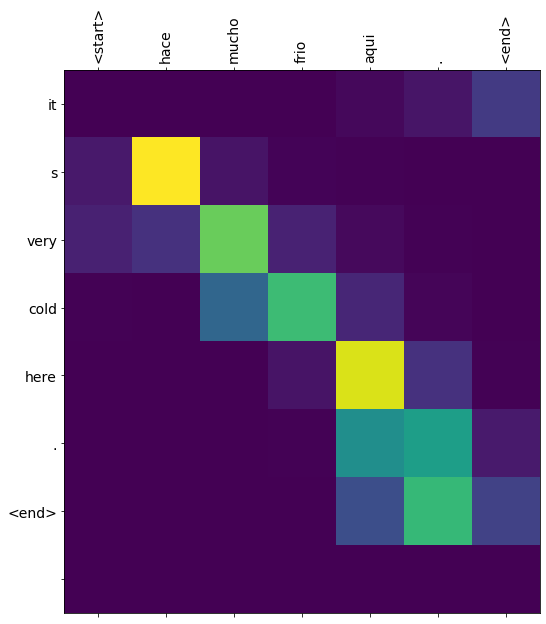

In [36]:
translate(u'hace mucho frio aqui.')

Input: <start> esta es mi vida . <end>
Predicted translation: this is my life . <end> 


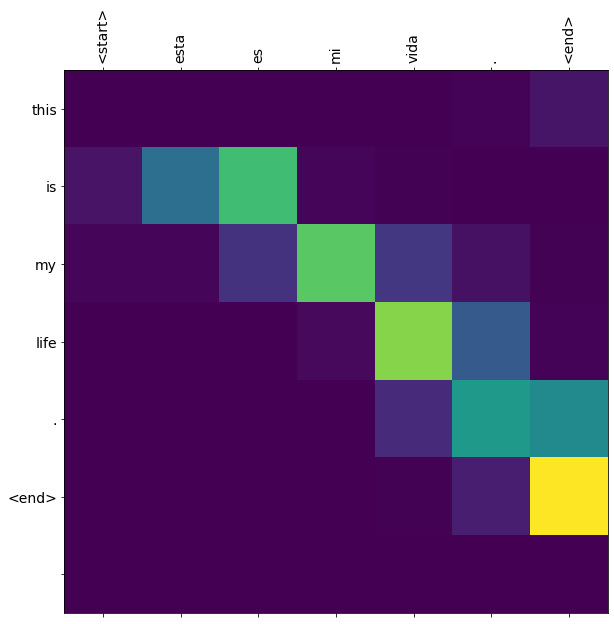

In [37]:
translate(u'esta es mi vida.')

Input: <start> ¿ todavia estan en casa ? <end>
Predicted translation: are you still home ? <end> 


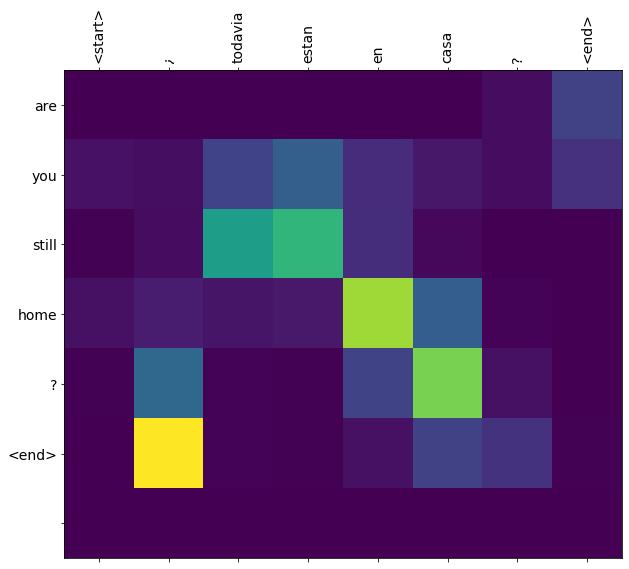

In [38]:
translate(u'¿todavia estan en casa?')

Input: <start> trata de averiguarlo . <end>
Predicted translation: go of us out . <end> 


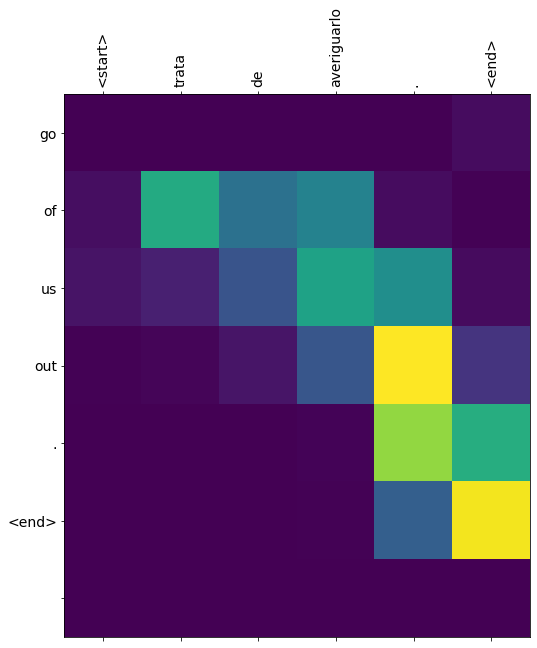

In [39]:
# wrong translation
translate(u'trata de averiguarlo.')

## [ 과제 ] 다른 나라 언어로 각자가 실험을 한다 !!

### 다음 사이트에 가면 여러나라 언어에 대한 데이터가 있다

### 다른 언어 데이터로 앞에서 사용한 코드로 실험을 해본다. 

### (예)  English to Korean, or Korean to English


#### 과제 데이터 얻기 : http://www.manythings.org/anki/ 



# =======================================

# =========================================